# Metadata

```
Course:  DS 5100
Module:  07 Pandas
Topic:   HW: Myocardial Infarction Analytics with Pandas
Author:  R.C. Alvarado (adapted)
Date:    27 June 2022
```

# Student Metadata

```
Name:  PUT YOUR NAME HERE
UVAID: PUT YOUR UVA ID HERE, e.g. rca2t
URL:   PUT THE URL OF YOUR NOTEBOOK ON GITHUB HERE,
    e.g. https://github.com/ontoligent/DS5100-2022-06-R/blob/main/lessons/M04_PythonFunctions/HW/HW04_forest_fires_function_assignment.ipynb
```

# Objective

Use Pandas to perform operations, analytics, and visualization on healthcare data.

# Instructions

* Download the Myocardial Infarction (MI) Complications Data Set housed at UCI.  
  * A myocardial infarction is commonly called a heart attack.
  * Read about the dataset in the [Data Description File (DDF)](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#)
* You will work with some of the columns.  
  * A subset of these could be predictors in an ML model, while others could be outcome variables.  
  * The section **Attribute Information** in the DDF provides details.
* You will be asked to perform several tasks.  
  * Show your code and solutions clearly in the cells following each question.   

**TOTAL POINTS: 12**

# Set Up

In [1]:
import pandas as pd
import numpy as np

# Read in the dataset 

Read in the dataset from the UCI Machine Learning Repository.

Use Pandas' `read_csv()` function, giving the path to the dataset as an argument.  

There is no header in this data, so pass a second argument `header=None`.

In [5]:
path_to_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data"
dataset = pd.read_csv(path_to_data, header=None)

## Q1
(1 PT) 1. Print the number of records in the dataset

First import the data file as a dataframe.

In [10]:
# CODE HERE
df = pd.DataFrame(dataset)
len(df)

1700

## Q2 

(1 PT) 2. Show the first three records in the dataset</span>

In [12]:
# CODE HERE
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0


# Working with AGE

The second column contains patient age. If your dataframe is named `df`, you can reference the column with: `df[1]`.

Generally the field names will be strings and you can use `df['age']` to access field `age`, as an example).

## Q3

(1 PT) 3. One complication: missing values are filled with `?` which will cause problems (e.g., stats can't be computed easily). 

Count the number of records in `df[1]` containing `?`.

In [14]:
# CODE HERE
len(df[df[1] == '?'])

8

## Q4 

(1 PT) 4. Write code to replace `?` with `np.nan` in the column `df[1]` of your dataframe.

In [19]:
# CODE HERE
df.loc[df[1] == '?', 1] = np.nan

## Q5

(1 PT) 5. Print the number of records containing `np.nan` in the column `df[1]` of your dataframe.

In [21]:
# CODE HERE
df[1].isna().sum()

8

# Another complication

Another complication: the age data is saved as strings, and there are the null values. 

Here's an example:

```python
# inspect first element
df[1].iloc[0]

'77'
```

```python
# check the column type
df[1].dtype

dtype('O')

```

To convert the column to numeric, we can use `apply()` with a lambda function.  

If the type is string, we cast to numeric, otherwise it's null and we leave things alone.  

`isinstance(x, str)` checks if `x` is a string, returning a bool.  

Review this code for understanding:

```python
df[1] = df[1].apply(lambda x: float(x) if isinstance(x, str) else x)
```

## Q6

(1 PT) 6. Run the lambda function above, then show the data type of `age` is no longer string type.

In [22]:
# CODE HERE
df[1] = df[1].apply(lambda x: float(x) if isinstance(x, str) else x)
df[1].dtype

dtype('float64')

## Q7

(1 PT) 7. Compute the median age

In [23]:
# CODE HERE
df[1].median()

63.0

# Working with GENDER

The third column contains patient gender; again since indexing starts at zero, you'll reference df[2]

## Q8

(1 PT) 8. Print the frequency AND percentage of each gender.

Hint: The function you'll use to compute frequencies will take an argument to compute percentages.

In [26]:
# CODE HERE
df[2].value_counts()

1    1065
0     635
Name: 2, dtype: int64

In [27]:
df[2].value_counts(normalize=True)

1    0.626471
0    0.373529
Name: 2, dtype: float64

# Working with Essential Hypertension (EH)

Reference this column with `df[8]`. 

## Q9

(1 PT) 9. Enter the most frequent value.

In [29]:
# CODE HERE
df[8].value_counts()

# 2 is the most frequent value

2    880
0    605
3    195
1     11
?      9
Name: 8, dtype: int64

# Working with Atrial Fibrillation (AFIB)

Reference this column with `df[112]`.  

AFIB is one of the complications and outcomes of myocardial infarction.

## Q10

(1 PT) 10. Print the number of AFIB cases (value=1).

In [32]:
# CODE HERE
print(df[112].value_counts()[1])

170


# Combining Age and AFIB

We construct a new dataframe containing only columns: AGE, AFIB.

AGE lives in `df[1]` and AFIB lives in `df[112]`.

So do this:

```python
df2 = df[[1, 112]]
```
And see what you have:
```python
df2
```

## Q11

(1 PT) 11. Print the shape of this dataframe.

In [35]:
# CODE HERE
df2 = df[[1, 112]]
df2.shape

(1700, 2)

# Plotting

We are going to plot AGE and AFIB, so renaming the columns to strings will make things visualization more readable.  
We use `rename()` for this:

```python
df2 = df2.rename(columns={1:'age', 112:'AFIB'})
df2.head()
```

## Q12

(1 PT) 12. Dispplay a boxplot with AFIB on the x-axis and Age on the y-axis</span> 

Use the the `seaborn` package for this.
            
Here is the [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html), but all you need to do is this:

```python
from seaborn import boxplot
```

And then use the `boxplot()` function to visualize your data.

In [36]:
# CODE HERE
df2 = df2.rename(columns={1:'age', 112:'AFIB'})
df2.head()

,age,AFIB
0,77.0,0
1,55.0,0
2,52.0,0
3,68.0,0
4,60.0,0


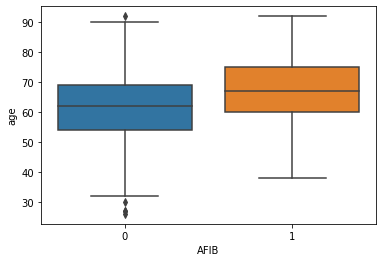

In [44]:
from seaborn import boxplot
boxplot(x=df2['AFIB'], y=df2['age']);

Ungraded question: What do you notice about the difference in age distributions between AFIB/non-AFIB groups?

The two distributions are similar in size, but the people with AFIB are older, which makes sense given AFIB is a type of cardiovascular disease.